In [11]:
%pip install opencv-python



Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
import cv2
import matplotlib.pyplot as plt

In [18]:
config_file="model/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="model/frozen_inference_graph.pb"


In [19]:
print(config_file)

model/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt


In [20]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [21]:
classLabels=[]
file_name="model/labels.txt"
with open(file_name,"rt") as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
print(classLabels)    

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [22]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000027E5B21CAF0>

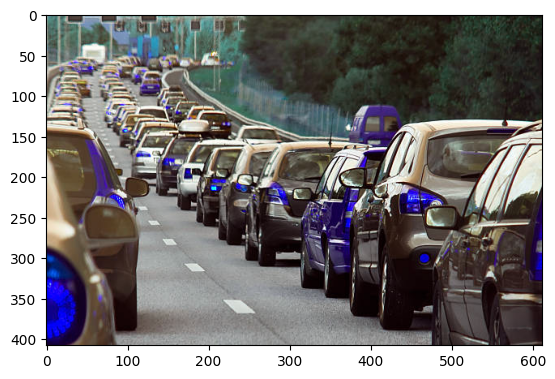

In [34]:
img=cv2.imread("images/carr.jpg")
plt.imshow(img)

In [35]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)

In [36]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, (boxes[0], boxes[1]), (boxes[2], boxes[3]), (255, 0, 0), 2)
    
    label = classLabels[ClassInd - 1]  
    cv2.putText(
        img,
        label,
        (boxes[0] + 10, boxes[1] - 10),  
        font,
        fontScale=font_scale,
        color=(0, 255, 0),
        thickness=3
    )


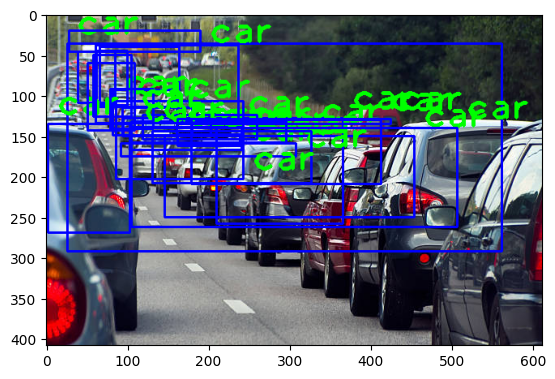

In [37]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
import cv2

cap = cv2.VideoCapture("C:/Users/sudhe/Videos/2024-10-18 10-54-57.mkv")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Can't open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break  
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)  
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:  
                cv2.rectangle(frame, (boxes[0], boxes[1]), (boxes[2], boxes[3]), (255, 0, 0), 2)

                label = classLabels[ClassInd - 1]  
                cv2.putText(
                    frame,
                    label,
                    (boxes[0] + 10, boxes[1] - 10),  
                    font,
                    fontScale=font_scale,
                    color=(0, 255, 0),
                    thickness=3
                )
    
    cv2.imshow("Object Detection", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Can't open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break  
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)  
    
    if len(ClassIndex) != 0:  
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:  
                cv2.rectangle(frame, (boxes[0], boxes[1]), (boxes[2], boxes[3]), (255, 0, 0), 2)

                label = classLabels[ClassInd - 1] 
                cv2.putText(
                    frame,
                    label,
                    (boxes[0] + 10, boxes[1] - 10),  
                    font,
                    fontScale=font_scale,
                    color=(0, 255, 0),
                    thickness=3
                )
    
    cv2.imshow("Object Detection", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
